<h1 style="text-align: center;">Exploratory Data Analysis</h1>

In [2]:
%load_ext autoreload
%autoreload 2

from functions import *

In [5]:
df_work = pd.read_csv("Data/preprocessed_data.csv")

df_work.columns

Index(['Date', 'Score', 'Quality', 'Sleep_duration', 'Bedtime', 'Type',
       'Activity_distance', 'Activity_calories', 'Duration',
       'Activity_average_heart_rate', 'Activity_maximum_heart_rate',
       'Aerobic_TE', 'Average_running_cadence', 'Maximum_running_cadence',
       'Average_pace', 'Best_pace', 'Maximum_temperature',
       'Activity_average_respiratory_frequency',
       'Activity_minimum_respiratory_frequency',
       'Activity_maximum_respiratory_frequency', 'Travel_time', 'Elapsed_time',
       'Minimum_altitude', 'Maximum_altitude', 'Highest_HR', 'Active_calories',
       'Resting_calories', 'Total_calories', 'Awake_time', 'N_activities',
       'Total_duration', 'Total_distance', 'Total_aerobic_TE'],
      dtype='object')

## Score

count    405.000000
mean      74.118519
std       21.441165
min       15.000000
1%        16.000000
25%       70.000000
50%       83.000000
75%       88.000000
99%       96.000000
max       99.000000
Name: Score, dtype: float64


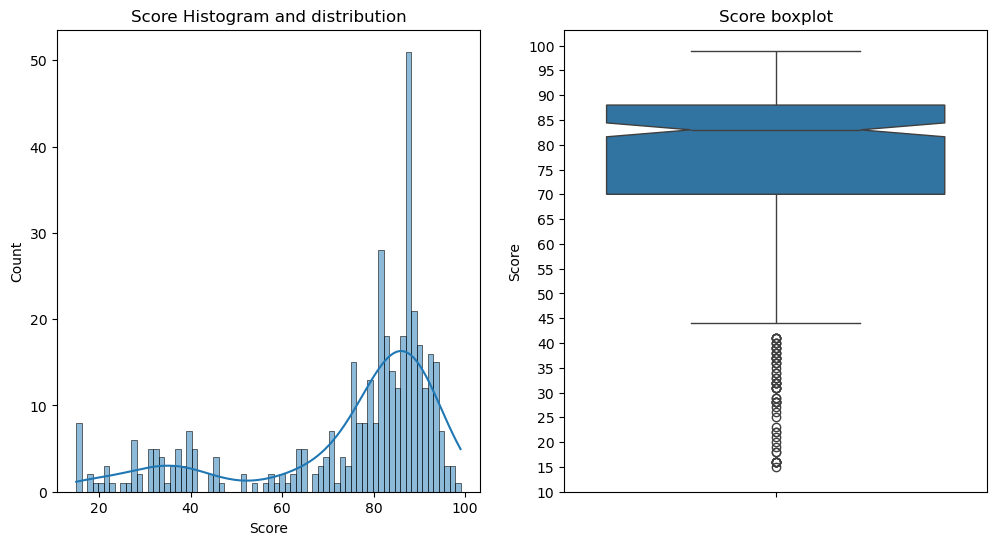

In [6]:
print(df_work['Score'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

bins = df_work['Score'].nunique()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df_work, x='Score', kde=True, bins=bins, ax=axs[0])
axs[0].set_title('Score Histogram and distribution')

sns.boxplot(data=df_work, y='Score', ax=axs[1], notch=True)
axs[1].set_title('Score boxplot')
axs[1].set_yticks([i for i in range(10, 100+5, 5)])

plt.show()

## Sleep duration

count    405.000000
mean       7.707942
std        1.770014
min        1.216667
1%         1.624667
25%        7.233333
50%        8.066667
75%        8.750000
99%       10.731333
max       11.616667
Name: Sleep_duration, dtype: float64


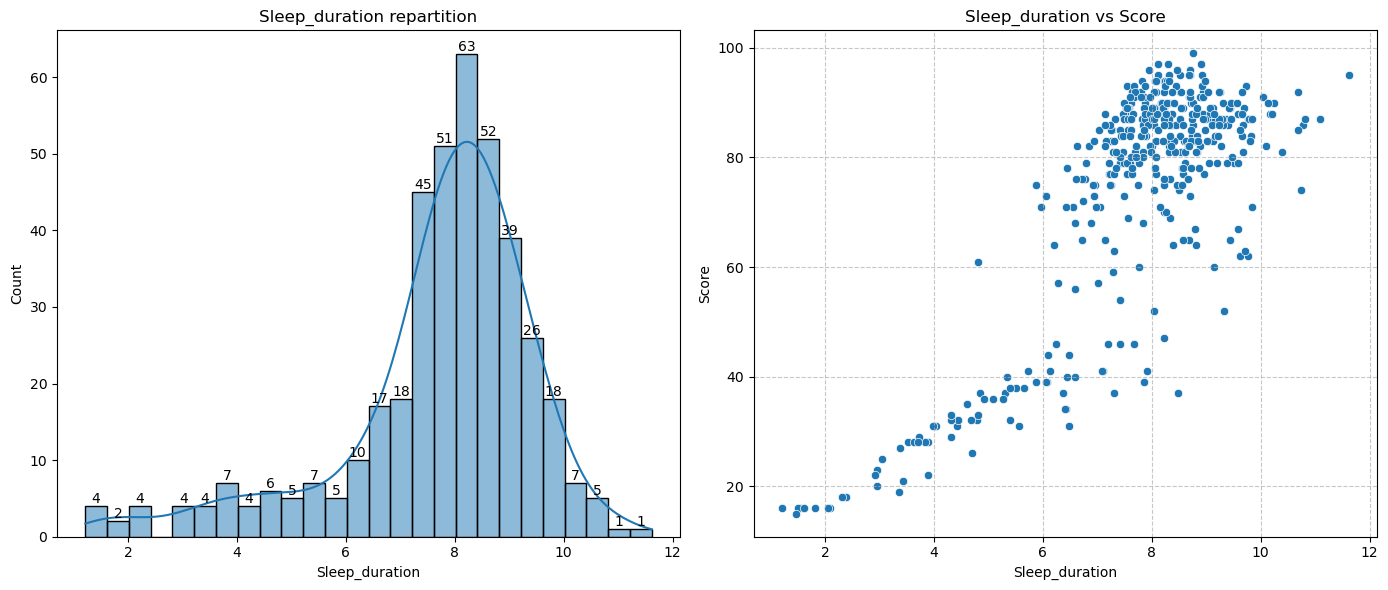

In [7]:
univariate_continous_EDA(data=df_work, var='Sleep_duration', activity_related=False)

## Bedtime

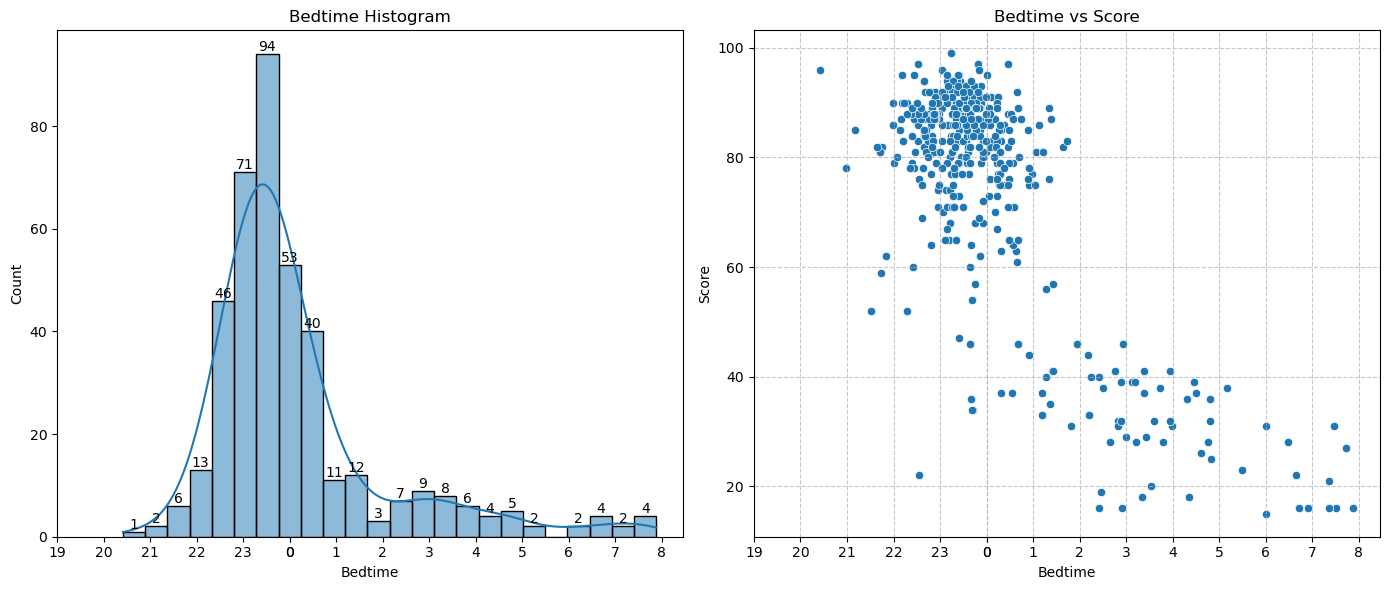

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

xticks = list(range(19, 25)) + list(range(0, 9))  # 18-24 followed by 0-8
xtick_labels = ['19', '20', '21', '22', '23', '24', '0', '1', '2', '3', '4', '5', '6', '7', '8']

# In order to have the bedtimes following on the graph we have to add 24 to them and play with the x label
adjusted_bedtime = df_work['Bedtime'].apply(lambda x: x + 24 if x < 8 else x)

# Histplot
bars = sns.histplot(adjusted_bedtime, bins=24, ax=axs[0], kde=True)
axs[0].set_title('Bedtime Histogram')
axs[0].set_xticks(ticks=list(range(19, 25)) + list(range(24, 33)), labels=xtick_labels)

# Scatterplot
sns.scatterplot(x=adjusted_bedtime, y=df_work['Score'], ax=axs[1])
axs[1].set_xticks(ticks=list(range(19, 25)) + list(range(24, 33)), labels=xtick_labels)
axs[1].set_xlabel("Bedtime")
axs[1].set_ylabel("Score")
axs[1].grid(visible=True, linestyle='--', alpha=0.7)
axs[1].set_title("Bedtime vs Score")

for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}' if height else '',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## Awake time

count    405.000000
mean      15.960192
std        1.961266
min       10.833333
1%        12.170667
25%       14.916667
50%       15.733333
75%       16.650000
99%       23.645333
max       24.883333
Name: Awake_time, dtype: float64


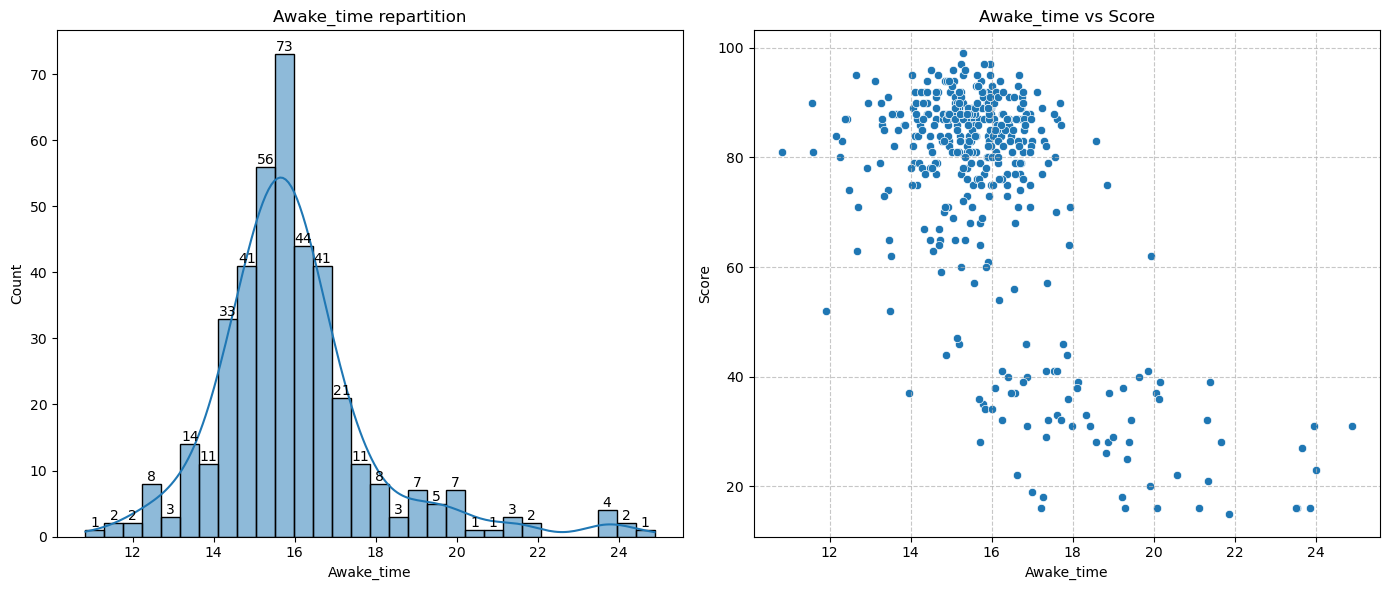

In [9]:
univariate_continous_EDA(data=df_work, var='Awake_time')

## Type and N_activities

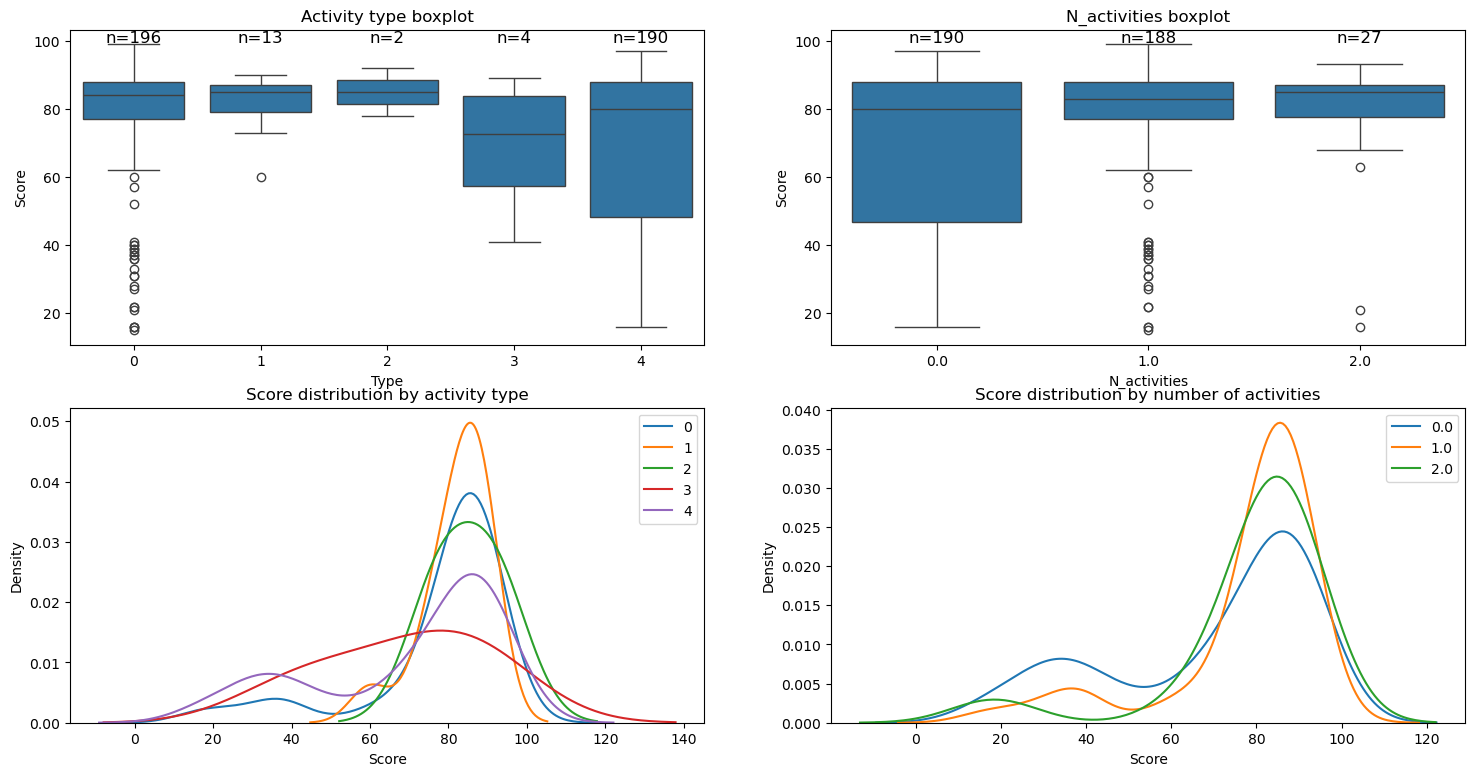

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

# Type boxplot
sns.boxplot(data=df_work, x='Type', y='Score', ax=axs[0, 0])
axs[0,0].set_title('Activity type boxplot')

group_sizes = df_work['Type'].value_counts()

for i, group in enumerate(group_sizes.index):
    size = group_sizes[group]# Positioning above the boxplot
    axs[0, 0].text(group, 103, f'n={size}', ha='center', va='top', fontsize=12, color='black')

# Type kdeplot
for i in sorted(df_work['Type'].unique()):
    sns.kdeplot(data=df_work.loc[df_work['Type'] == i], x='Score', label=i, ax=axs[1, 0])
axs[1, 0].legend()
axs[1, 0].set_title('Score distribution by activity type')



# N_activities boxplot
sns.boxplot(data=df_work, x='N_activities', y='Score', ax=axs[0, 1])
axs[0, 1].set_title('N_activities boxplot')

group_sizes = df_work['N_activities'].value_counts()

for i, group in enumerate(group_sizes.index):
    size = group_sizes[group]# Positioning above the boxplot
    axs[0, 1].text(i, 103, f'n={size}', ha='center', va='top', fontsize=12, color='black')

# N_activities kdeplot
for i in df_work['N_activities'].unique():
    sns.kdeplot(data=df_work.loc[df_work['N_activities'] == i], x='Score', label=i, ax=axs[1, 1])
axs[1, 1].legend()
axs[1, 1].set_title('Score distribution by number of activities')

plt.show()

## Activity distance

count    218.000000
mean       7.096628
std        3.911341
min        0.320000
1%         0.734800
25%        5.317500
50%        6.960000
75%        8.230000
99%       22.037900
max       26.930000
Name: Activity_distance, dtype: float64


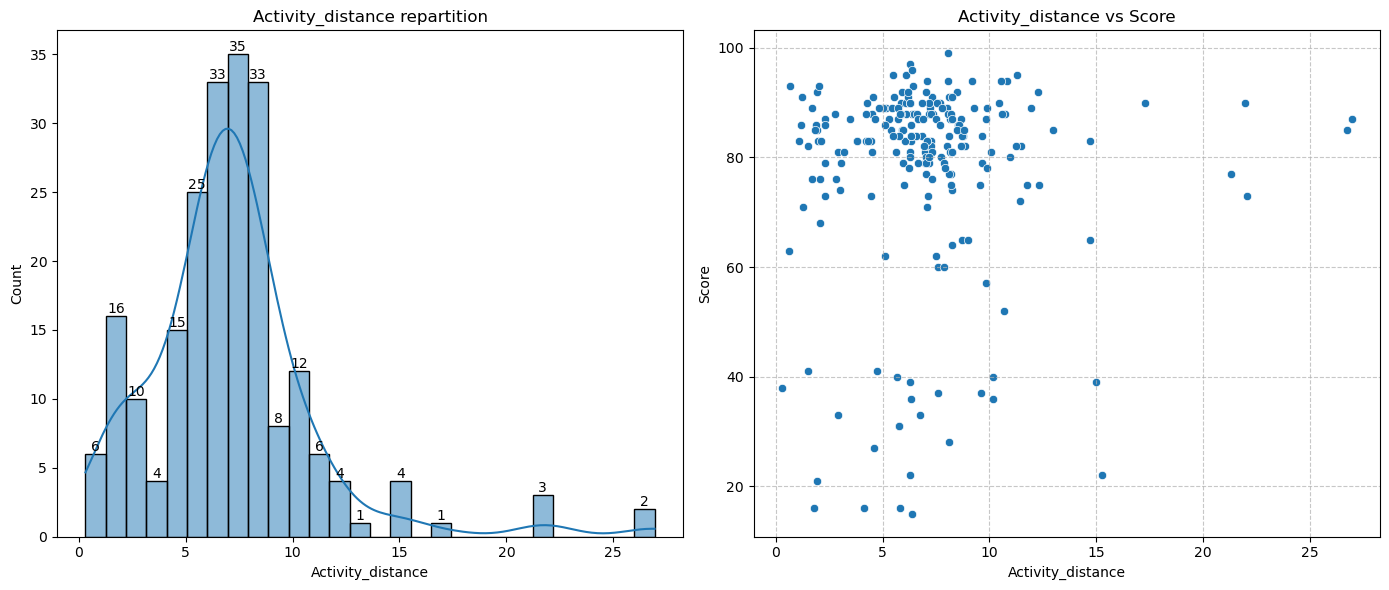

In [11]:
univariate_continous_EDA(data=df_work, var='Activity_distance', activity_related=True)

## Total distance

count    221.000000
mean       7.875588
std        4.250504
min        1.100000
1%         1.324000
25%        5.810000
50%        7.180000
75%        8.700000
99%       26.838000
max       29.830000
Name: Total_distance, dtype: float64


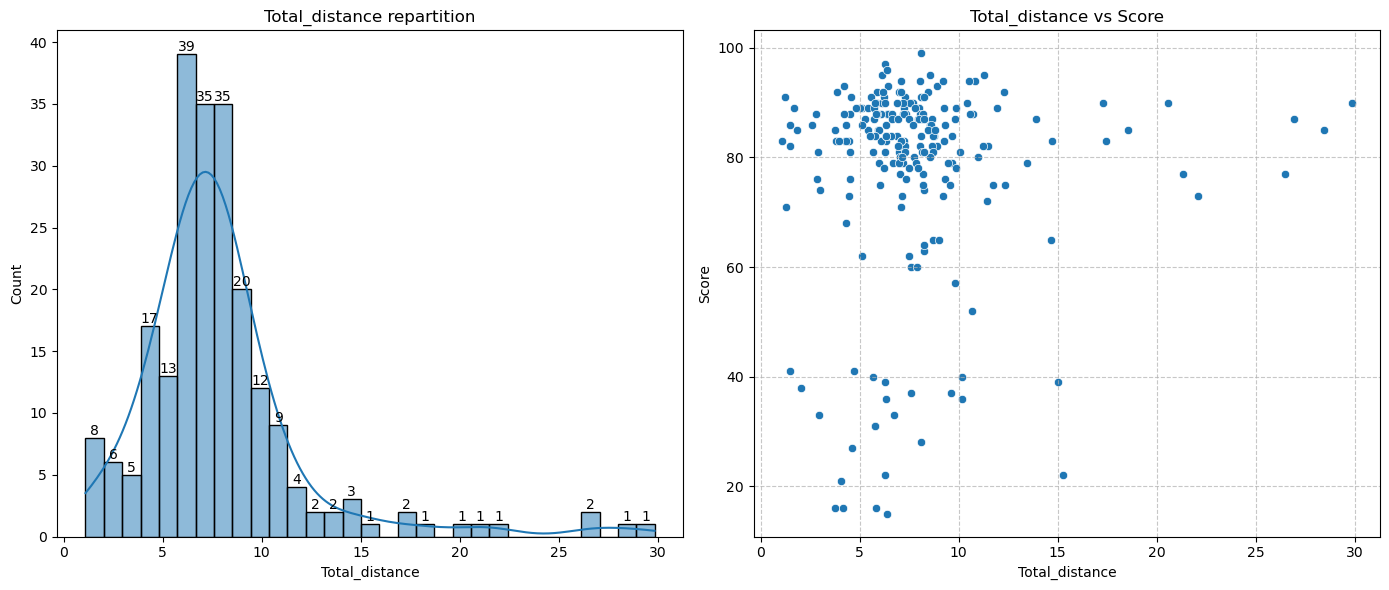

In [12]:
univariate_continous_EDA(data=df_work, var='Total_distance', activity_related=True)

## Activity calories

count     221.000000
mean      509.538462
std       236.519910
min        25.000000
1%         57.200000
25%       382.000000
50%       510.000000
75%       639.000000
99%      1182.400000
max      1763.000000
Name: Activity_calories, dtype: float64


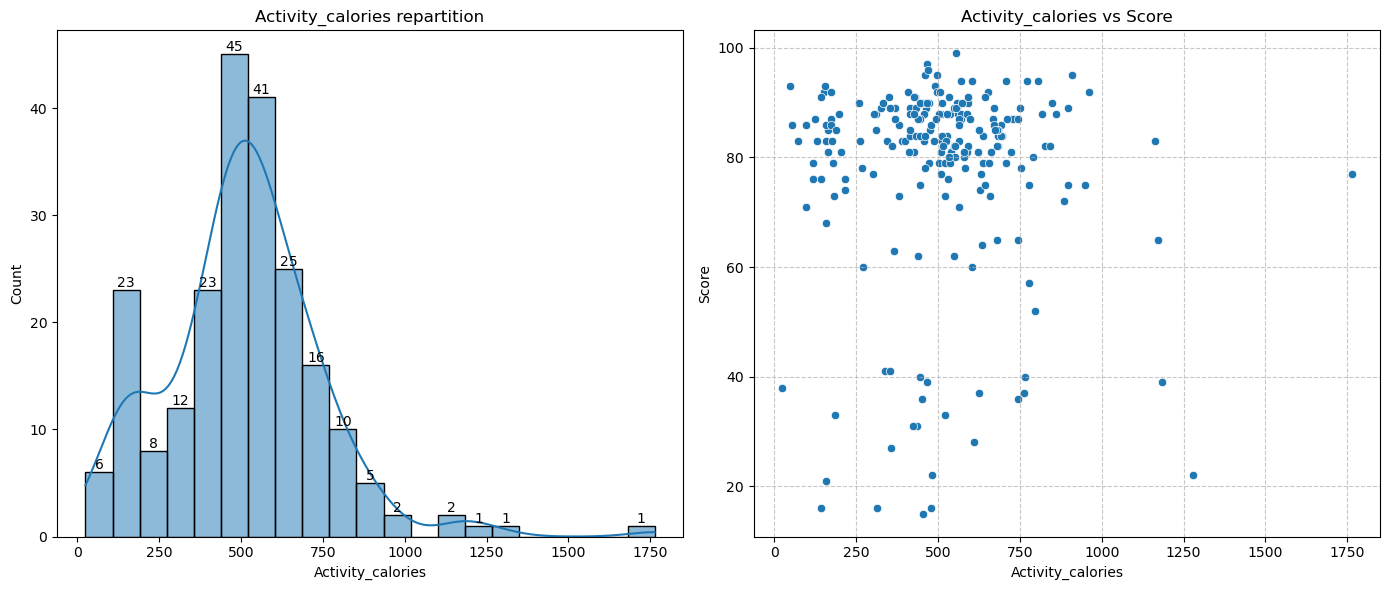

In [13]:
univariate_continous_EDA(data=df_work, var='Activity_calories', activity_related=True)

## Resting calories

count     405.000000
mean     2197.812346
std        11.751737
min      2111.000000
1%       2187.000000
25%      2193.000000
50%      2193.000000
75%      2203.000000
99%      2233.000000
max      2233.000000
Name: Resting_calories, dtype: float64


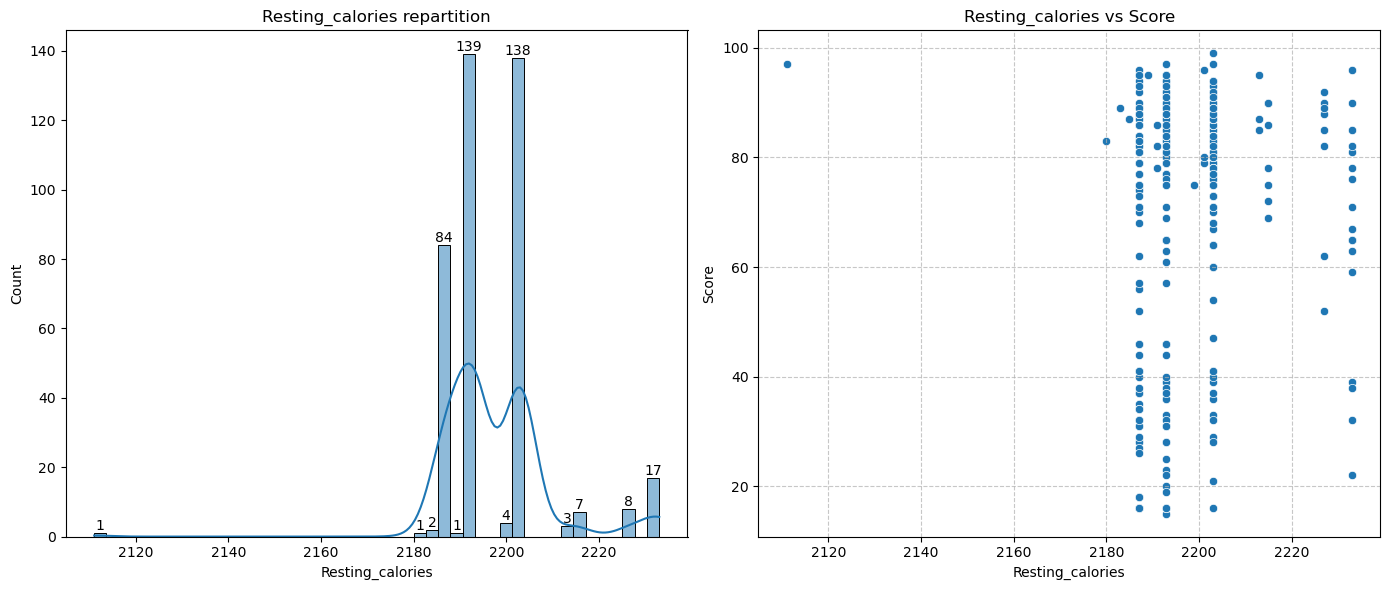

In [14]:
univariate_continous_EDA(data=df_work, var='Resting_calories', activity_related=True)

## Active calories

count     404.000000
mean      837.928218
std       650.182721
min         2.000000
1%         29.150000
25%       472.000000
50%       735.500000
75%       995.250000
99%      3323.430000
max      4317.000000
Name: Active_calories, dtype: float64


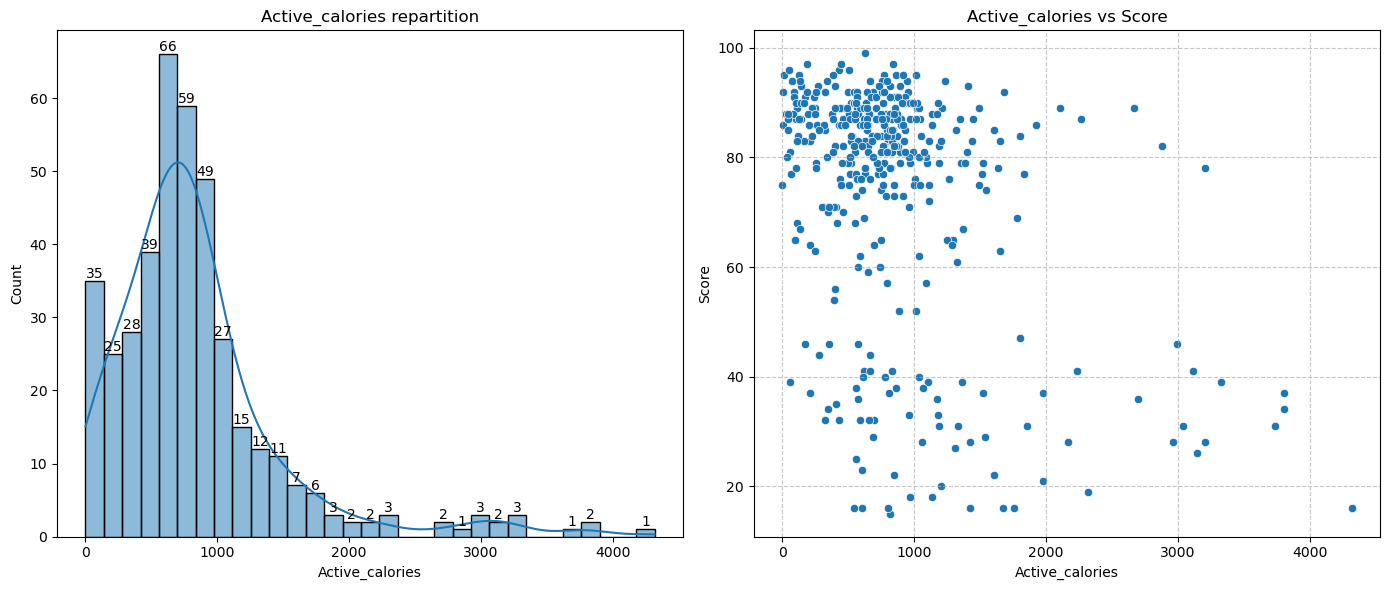

In [15]:
univariate_continous_EDA(data=df_work, var='Active_calories', activity_related=True)

## Total calories

count     405.000000
mean     3033.671605
std       649.648799
min      2197.000000
1%       2212.400000
25%      2653.000000
50%      2936.000000
75%      3195.000000
99%      5515.640000
max      6510.000000
Name: Total_calories, dtype: float64


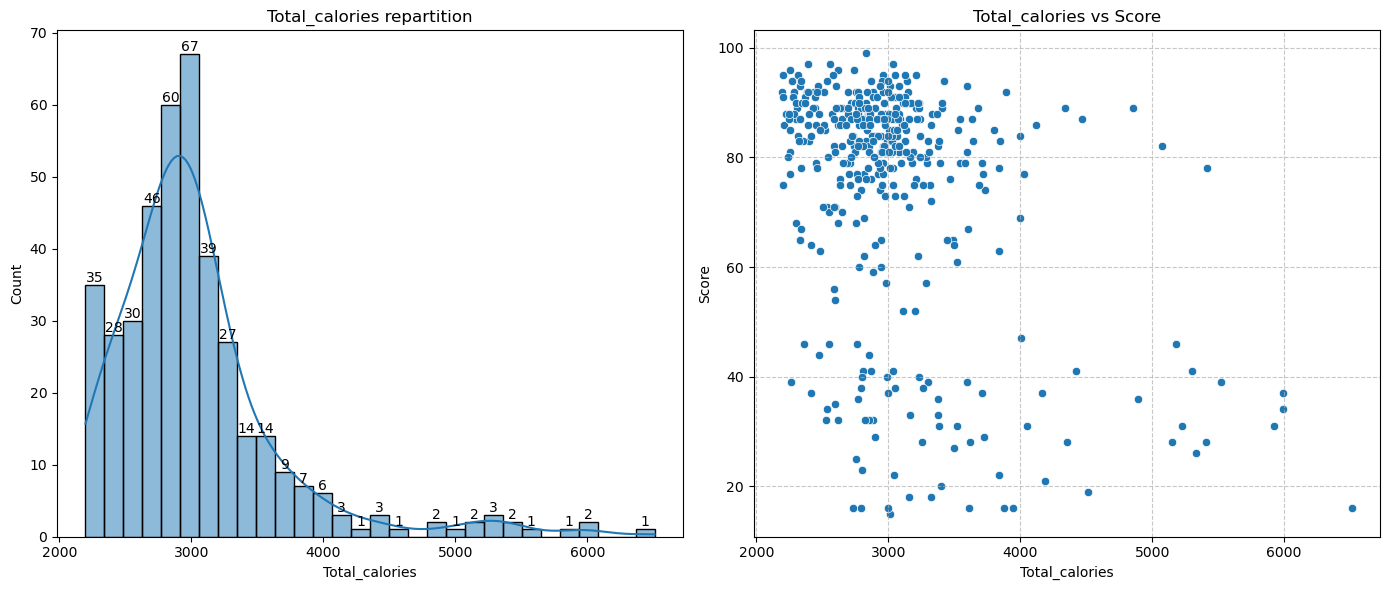

In [16]:
univariate_continous_EDA(data=df_work, var='Total_calories', activity_related=True)

## Duration

count    221.000000
mean      38.367986
std       16.453191
min        1.755000
1%         5.645667
25%       30.566667
50%       38.166667
75%       45.450000
99%       83.220000
max      121.416667
Name: Duration, dtype: float64


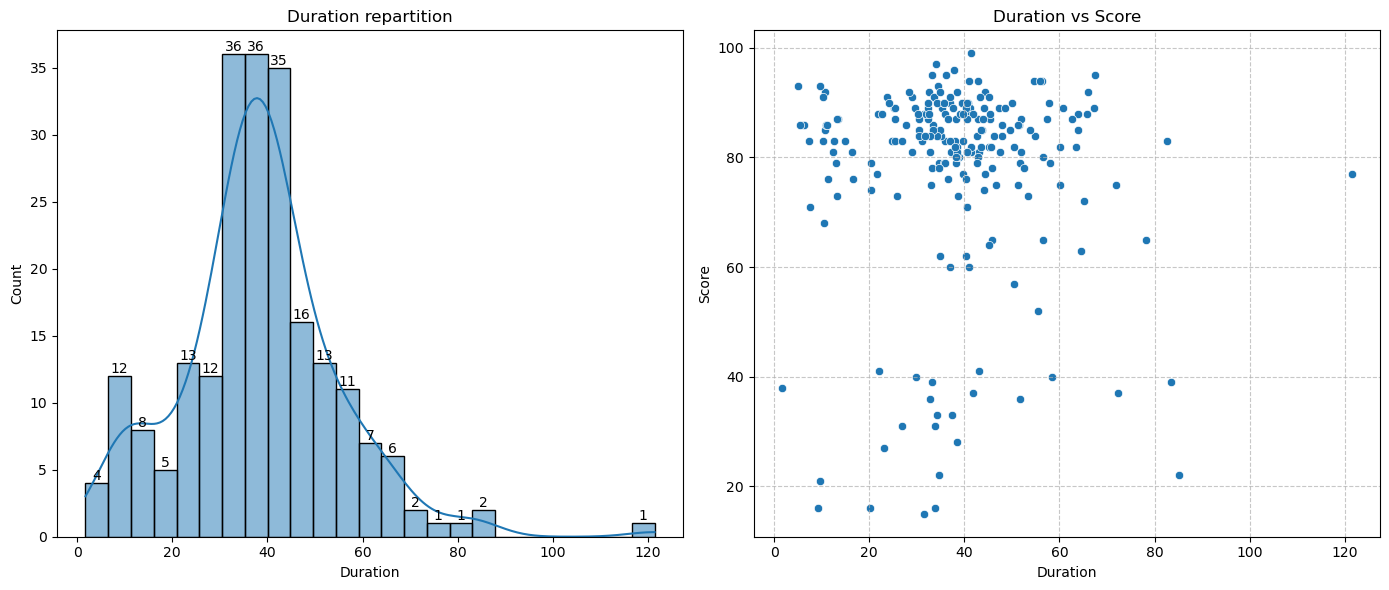

In [17]:
univariate_continous_EDA(data=df_work, var='Duration', activity_related=True)

## Total duration

count    221.000000
mean      44.922066
std       17.303870
min        7.371667
1%        10.489667
25%       34.583333
50%       41.350000
75%       51.933333
99%      110.856667
max      123.200000
Name: Total_duration, dtype: float64


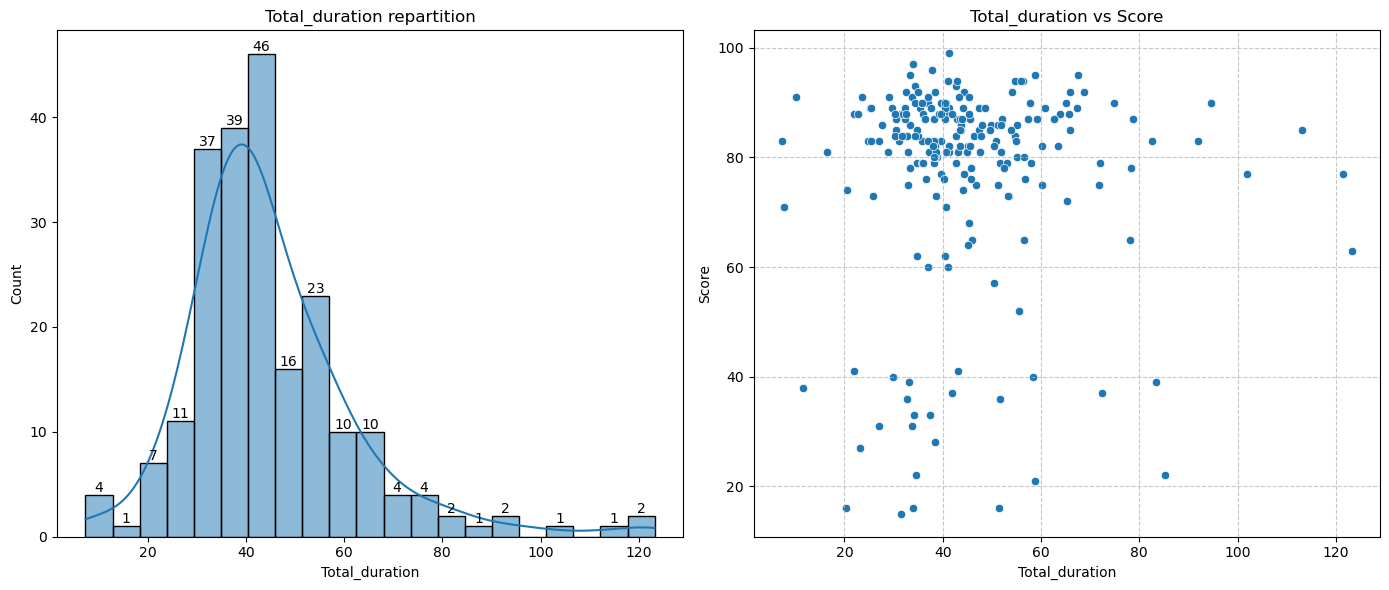

In [18]:
univariate_continous_EDA(data=df_work, var='Total_duration', activity_related=True)

## Activity average heart rate

count    221.000000
mean     149.705882
std       15.079770
min       88.000000
1%        99.200000
25%      144.000000
50%      152.000000
75%      158.000000
99%      175.000000
max      181.000000
Name: Activity_average_heart_rate, dtype: float64


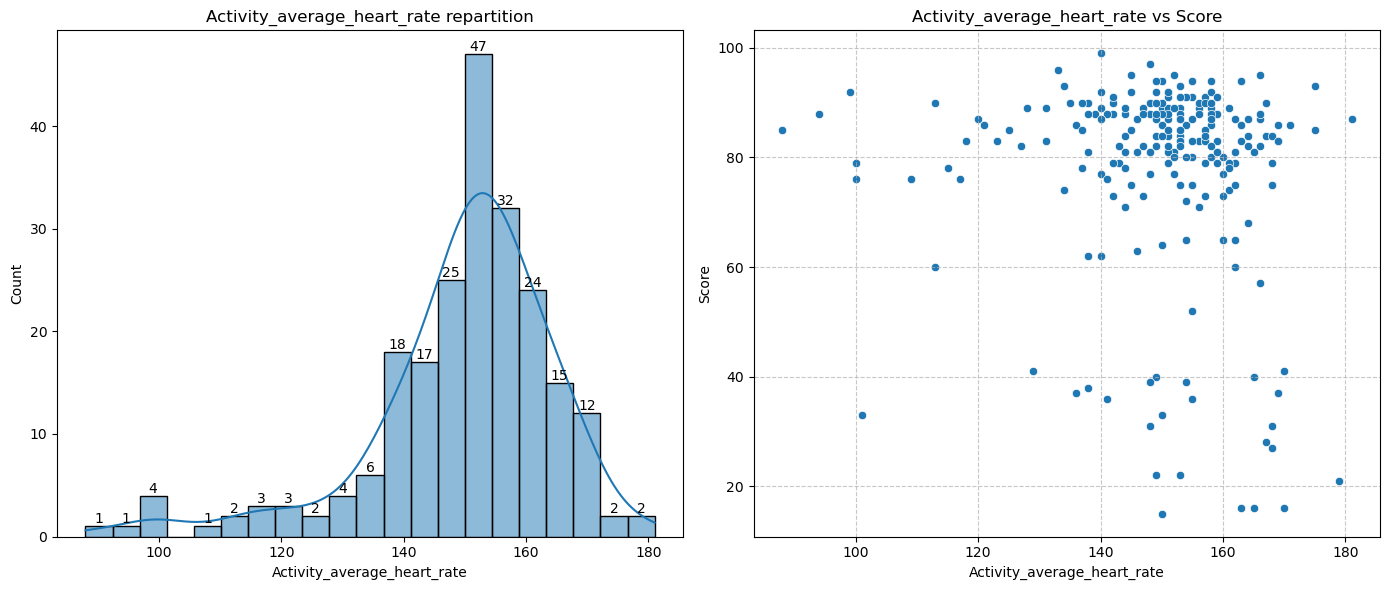

In [19]:
univariate_continous_EDA(data=df_work, var='Activity_average_heart_rate', target='Score', activity_related=True)

## Activity maximum heart rate

count    221.000000
mean     176.031674
std       18.678960
min      111.000000
1%       114.200000
25%      166.000000
50%      179.000000
75%      191.000000
99%      202.800000
max      203.000000
Name: Activity_maximum_heart_rate, dtype: float64


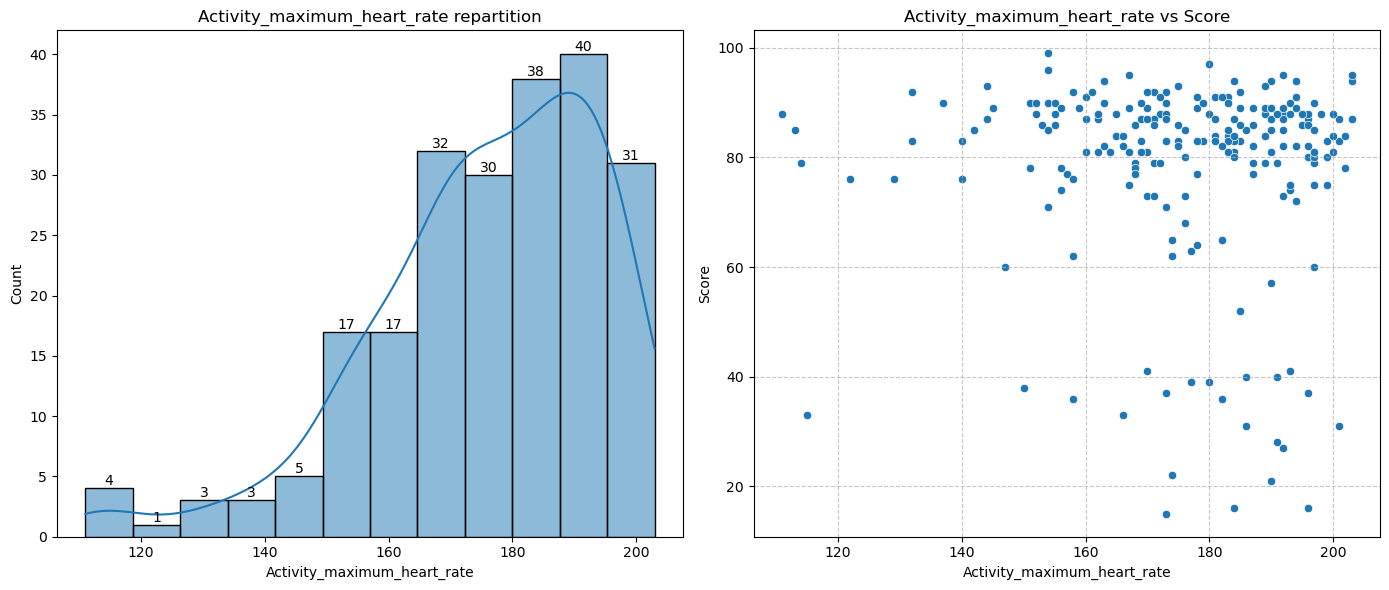

In [20]:
univariate_continous_EDA(data=df_work, var='Activity_maximum_heart_rate', target='Score', activity_related=True)

## Highest HR

count    405.000000
mean     149.886420
std       30.549375
min       83.000000
1%        91.120000
25%      123.000000
50%      151.000000
75%      177.000000
99%      217.760000
max      228.000000
Name: Highest_HR, dtype: float64


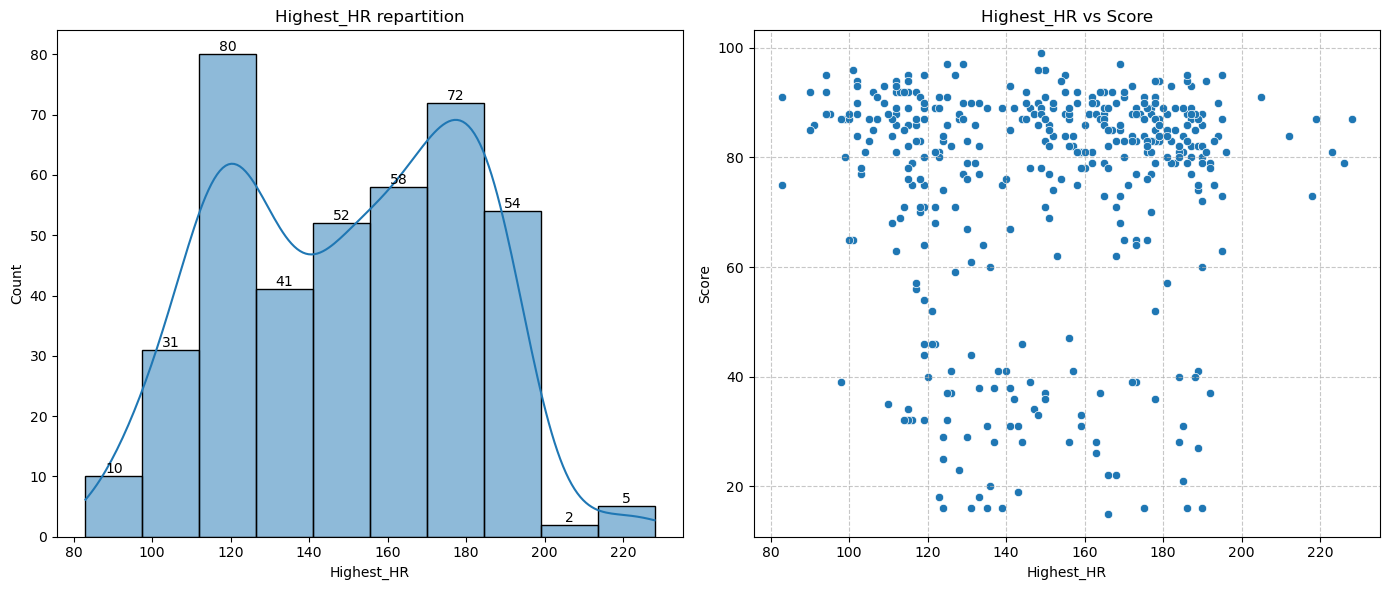

In [21]:
univariate_continous_EDA(data=df_work, var='Highest_HR', target='Score', activity_related=True)

## Total aerobic TE

count    221.000000
mean       3.587783
std        1.322871
min        0.200000
1%         0.540000
25%        3.000000
50%        3.300000
75%        3.800000
99%        7.900000
max        8.600000
Name: Total_aerobic_TE, dtype: float64


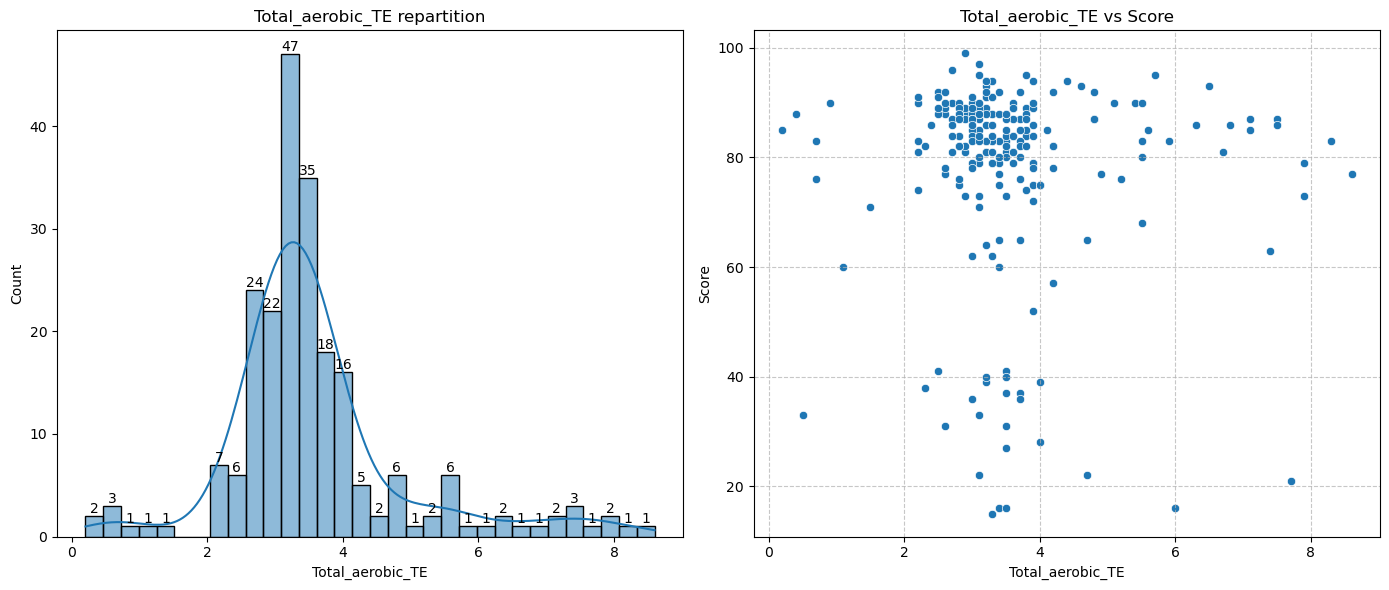

In [22]:
univariate_continous_EDA(data=df_work, var='Total_aerobic_TE', activity_related=True)

## Average_running_cadence

count    201.000000
mean     157.736318
std       14.687584
min       55.000000
1%        94.000000
25%      157.000000
50%      161.000000
75%      165.000000
99%      169.000000
max      170.000000
Name: Average_running_cadence, dtype: float64


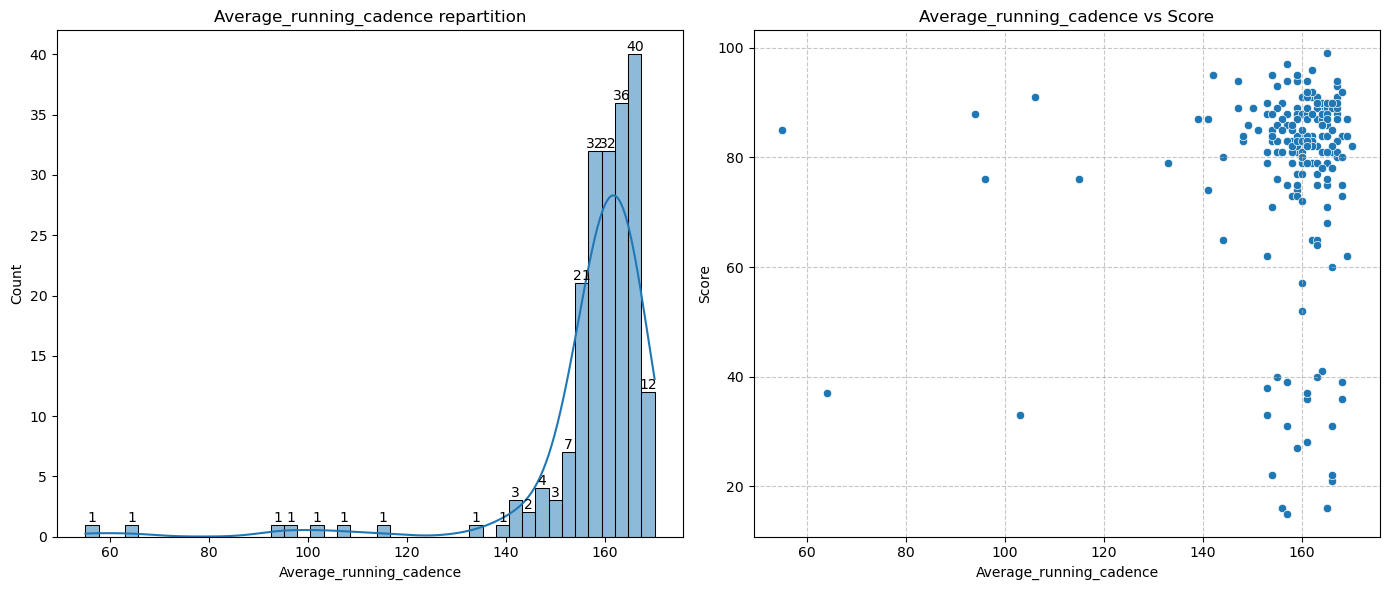

In [23]:
univariate_continous_EDA(data=df_work, var='Average_running_cadence', activity_related=True)

## Maximum_running_cadence

count    201.000000
mean     187.422886
std       23.766684
min      117.000000
1%       158.000000
25%      172.000000
50%      177.000000
75%      195.000000
99%      254.000000
max      255.000000
Name: Maximum_running_cadence, dtype: float64


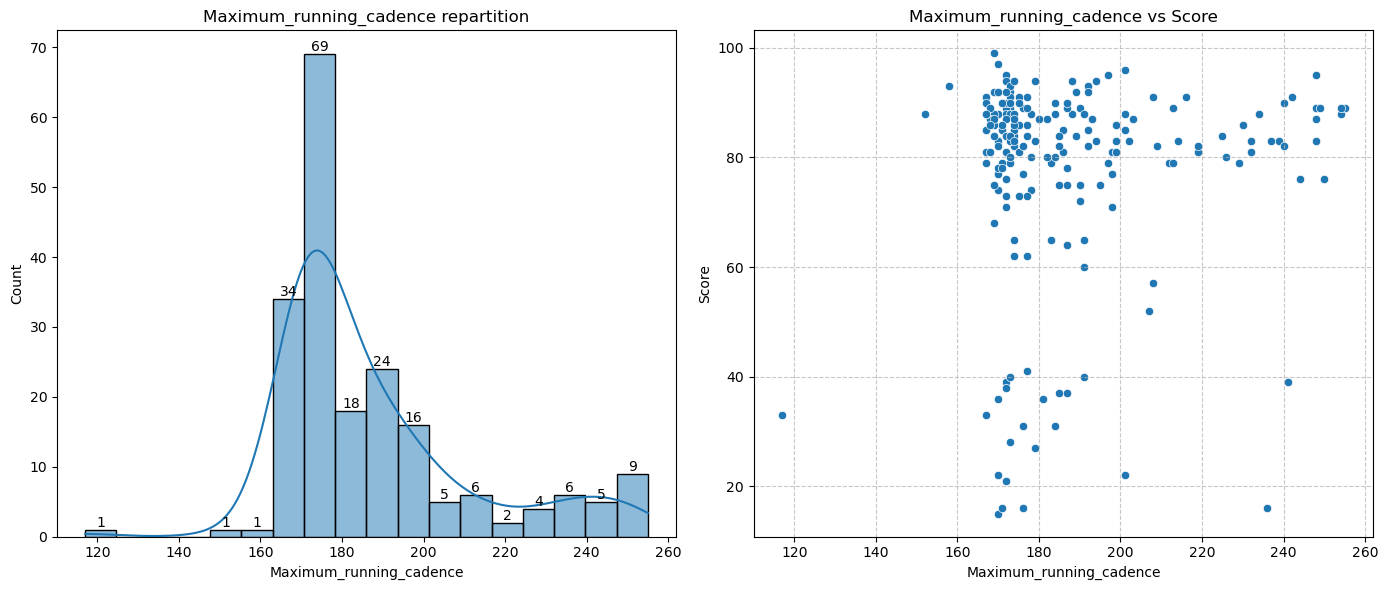

In [24]:
univariate_continous_EDA(data=df_work, var='Maximum_running_cadence', activity_related=True)

## Average_pace

count    218.000000
mean       5.912439
std        2.559674
min        2.281369
1%         2.336607
25%        5.200000
50%        5.475000
75%        5.829167
99%       19.805000
max       23.466667
Name: Average_pace, dtype: float64


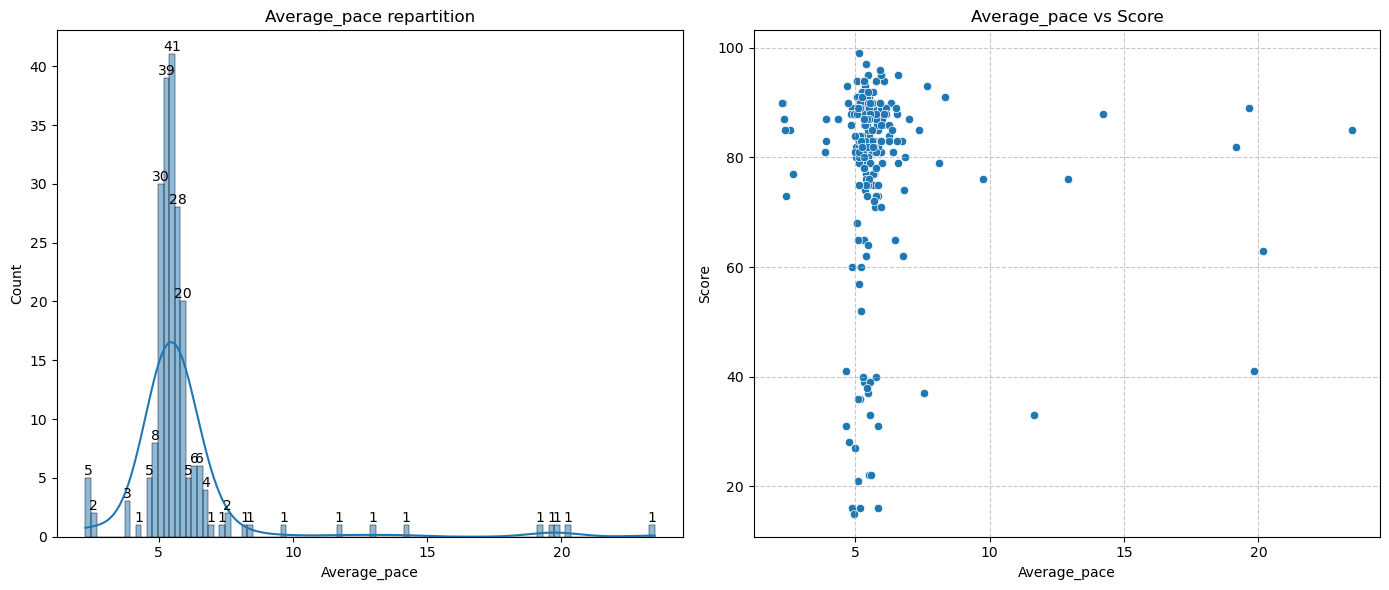

In [25]:
univariate_continous_EDA(data=df_work, var='Average_pace', target='Score', activity_related=True)

## Best_pace

count    219.000000
mean       4.011251
std        1.896399
min        0.891530
1%         1.314383
25%        3.183333
50%        3.900000
75%        4.408333
99%       14.229333
max       17.333333
Name: Best_pace, dtype: float64


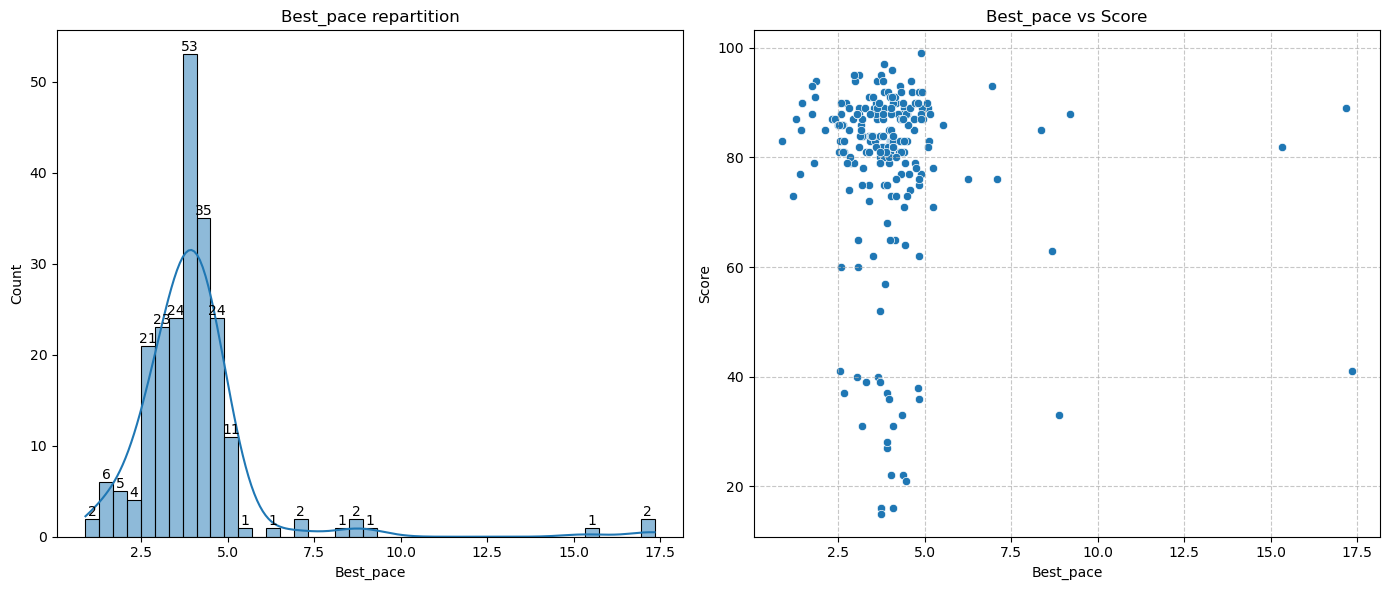

In [26]:
univariate_continous_EDA(data=df_work, var='Best_pace', target='Score', activity_related=True)

## Maximum temperature

count    217.000000
mean      27.105991
std        3.085631
min       14.000000
1%        19.160000
25%       25.000000
50%       27.000000
75%       29.000000
99%       33.000000
max       37.000000
Name: Maximum_temperature, dtype: float64


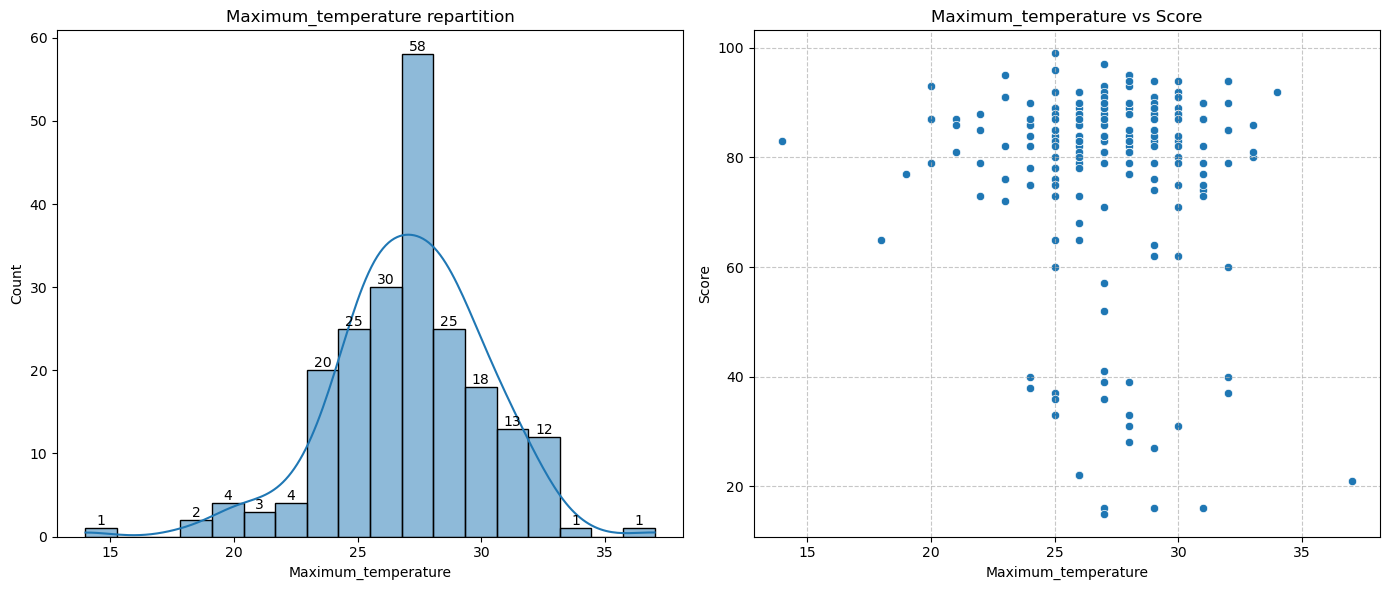

In [27]:
univariate_continous_EDA(data=df_work, var='Maximum_temperature', activity_related=True)

## Activity minimum respiratory frequency

count    152.000000
mean      18.914474
std        3.415865
min       11.000000
1%        12.000000
25%       17.000000
50%       19.000000
75%       21.000000
99%       27.490000
max       31.000000
Name: Activity_minimum_respiratory_frequency, dtype: float64


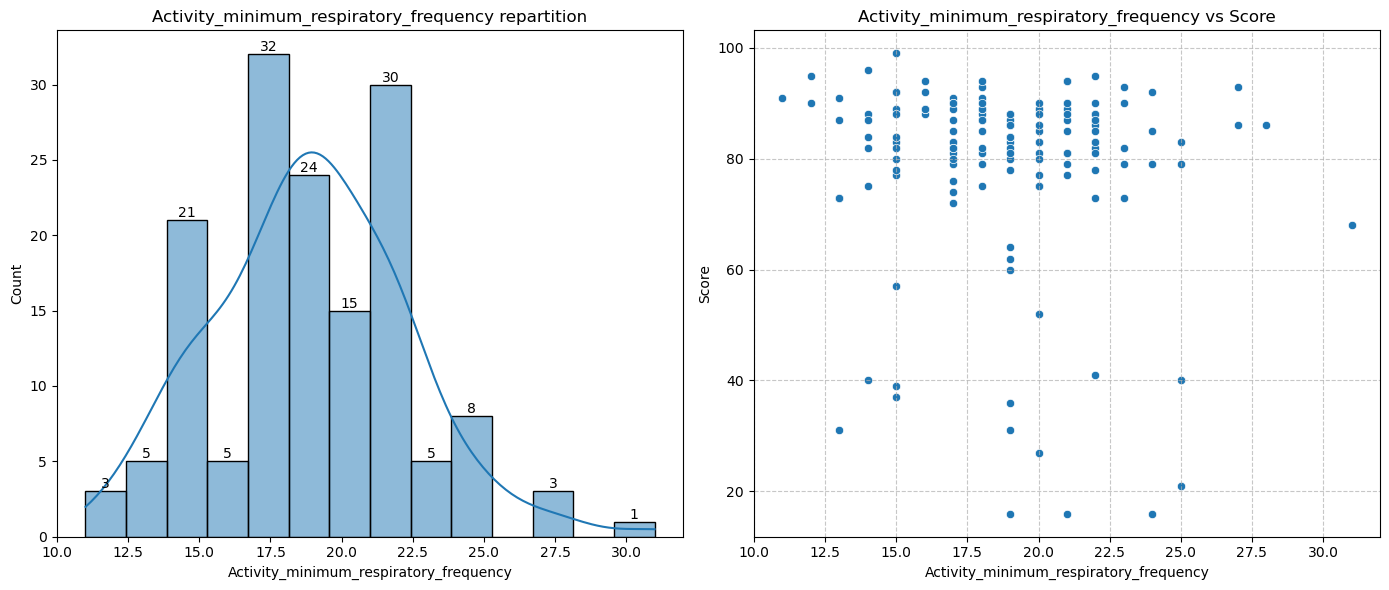

In [28]:
univariate_continous_EDA(data=df_work, var='Activity_minimum_respiratory_frequency', target='Score', activity_related=True)

## Activity maximum respiratory frequency

count    152.000000
mean      39.703947
std        3.335220
min       28.000000
1%        32.020000
25%       37.750000
50%       40.000000
75%       42.000000
99%       46.490000
max       47.000000
Name: Activity_maximum_respiratory_frequency, dtype: float64


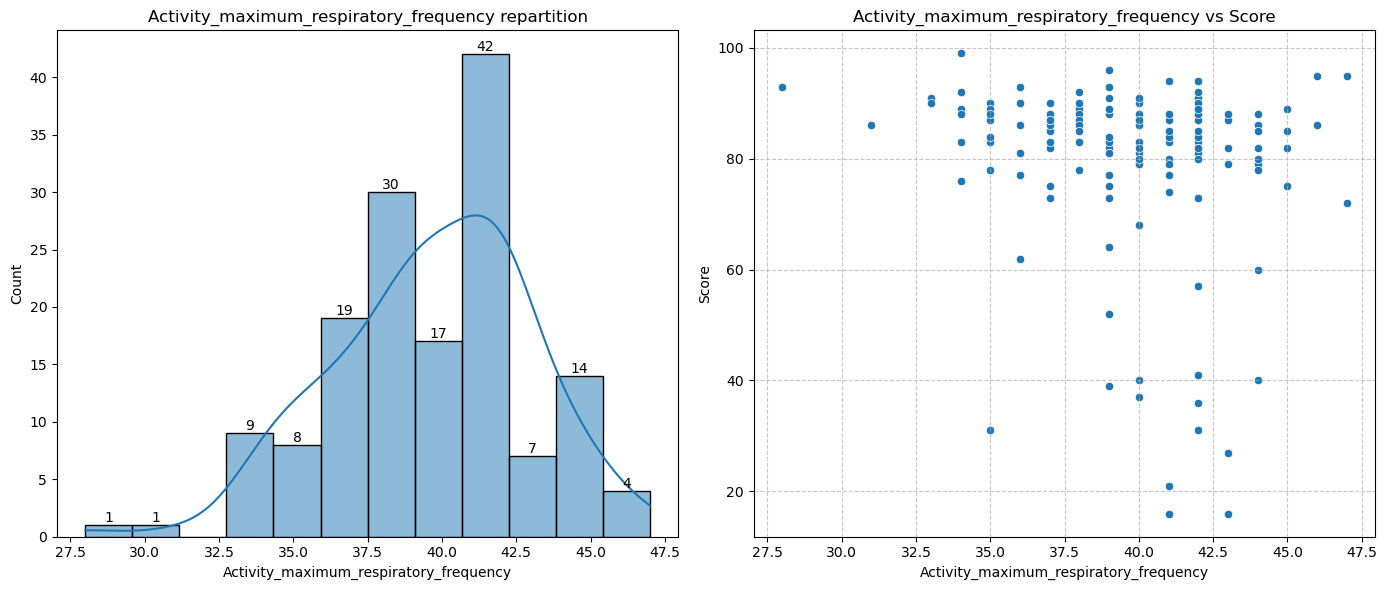

In [29]:
univariate_continous_EDA(data=df_work, var='Activity_maximum_respiratory_frequency', target='Score', activity_related=True)

## Activity average respiratory frequency

count    152.000000
mean      30.335526
std        3.064309
min       22.000000
1%        23.000000
25%       28.000000
50%       31.000000
75%       33.000000
99%       36.000000
max       36.000000
Name: Activity_average_respiratory_frequency, dtype: float64


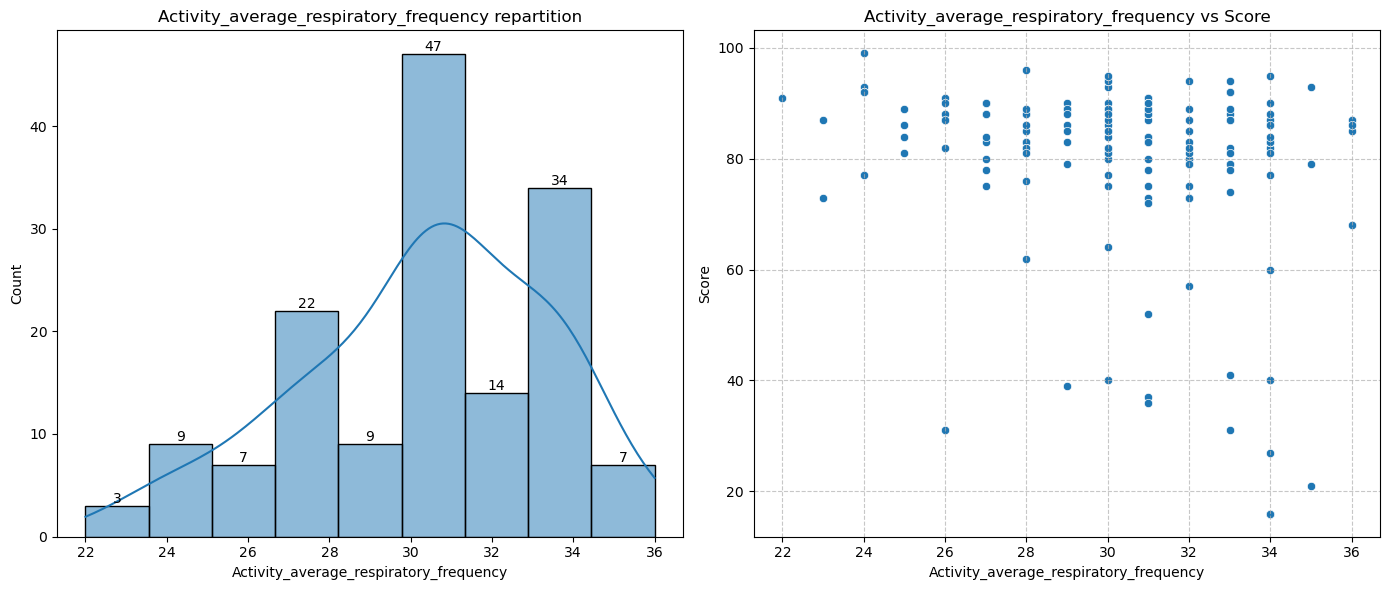

In [30]:
univariate_continous_EDA(data=df_work, var='Activity_average_respiratory_frequency', target='Score', activity_related=True)

## Travel time

count    221.000000
mean      36.764005
std       16.403727
min        1.683333
1%         5.268333
25%       29.300000
50%       36.466667
75%       44.350000
99%       83.166667
max      121.333333
Name: Travel_time, dtype: float64


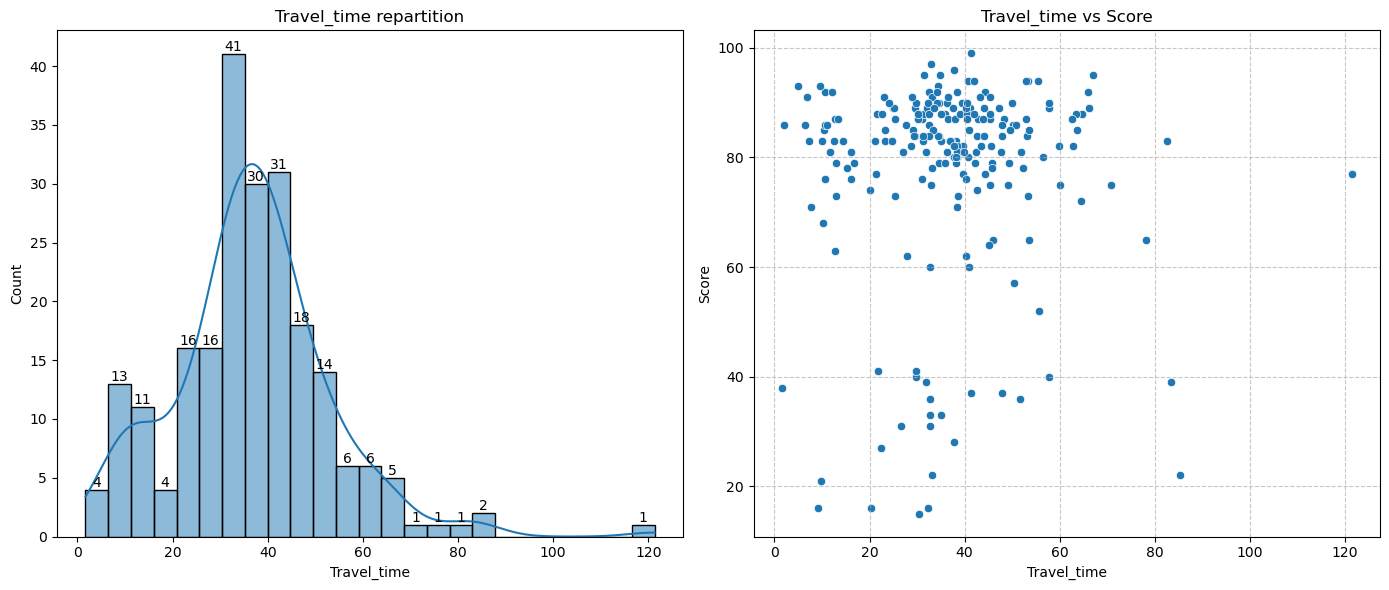

In [33]:
univariate_continous_EDA(data=df_work, var='Travel_time', target='Score', activity_related=True)

## Elapsed time

count    221.000000
mean      38.592345
std       16.755662
min        1.755000
1%         5.645667
25%       31.166667
50%       38.166667
75%       45.450000
99%       84.863333
max      121.416667
Name: Elapsed_time, dtype: float64


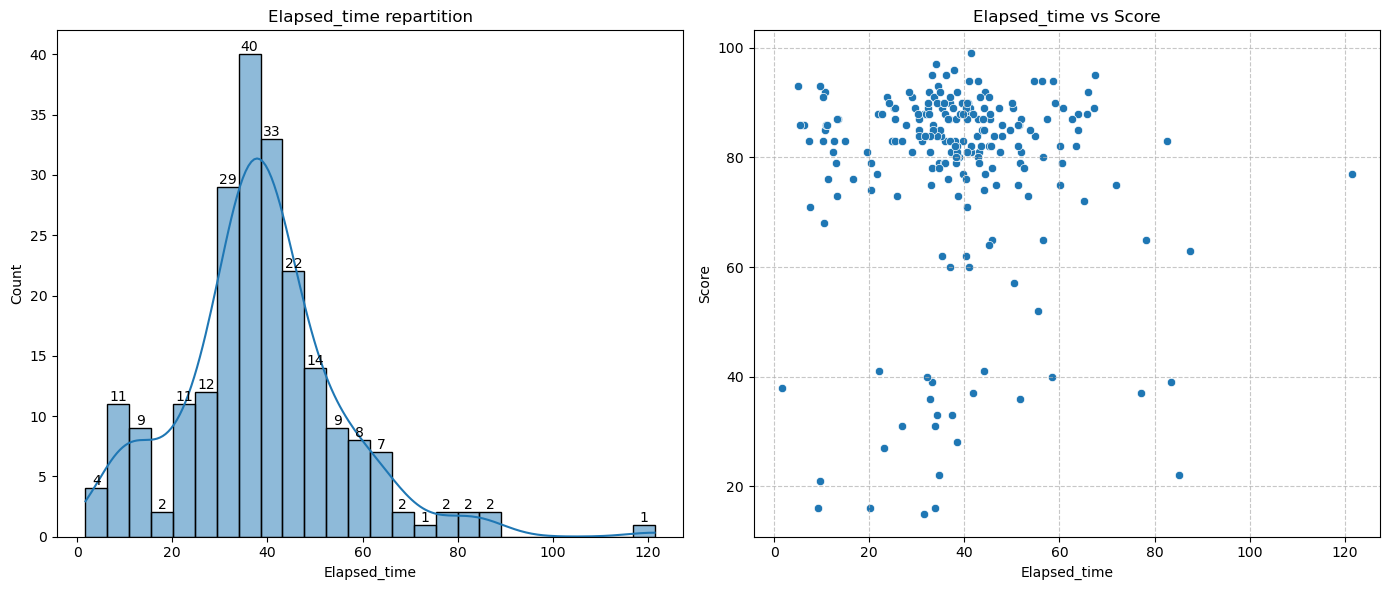

In [34]:
univariate_continous_EDA(data=df_work, var='Elapsed_time', target='Score', activity_related=True)

## Minimum altitude

count    211.000000
mean      44.886256
std       45.196358
min     -469.000000
1%       -31.400000
25%       35.500000
50%       59.000000
75%       63.500000
99%       77.900000
max      239.000000
Name: Minimum_altitude, dtype: float64


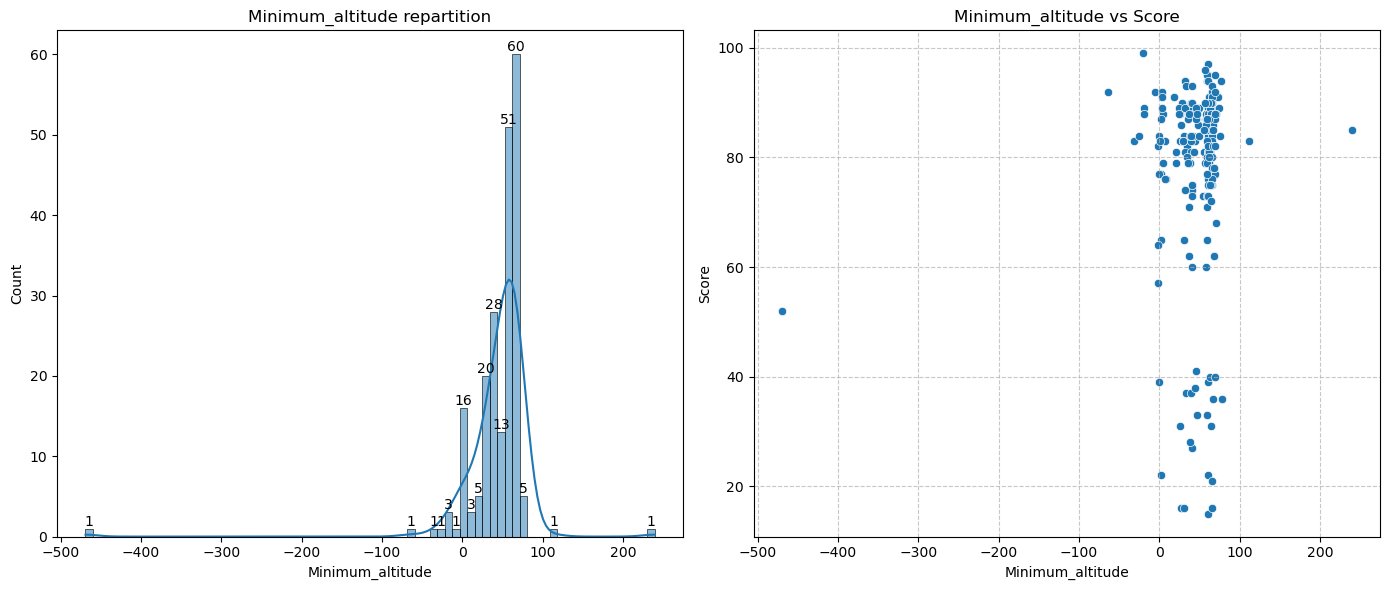

In [35]:
univariate_continous_EDA(data=df_work, var='Minimum_altitude', target='Score', activity_related=True)

## Maximum altitude

count    207.000000
mean      70.545894
std       22.229093
min       28.000000
1%        40.120000
25%       53.000000
50%       72.000000
75%       84.000000
99%      139.760000
max      242.000000
Name: Maximum_altitude, dtype: float64


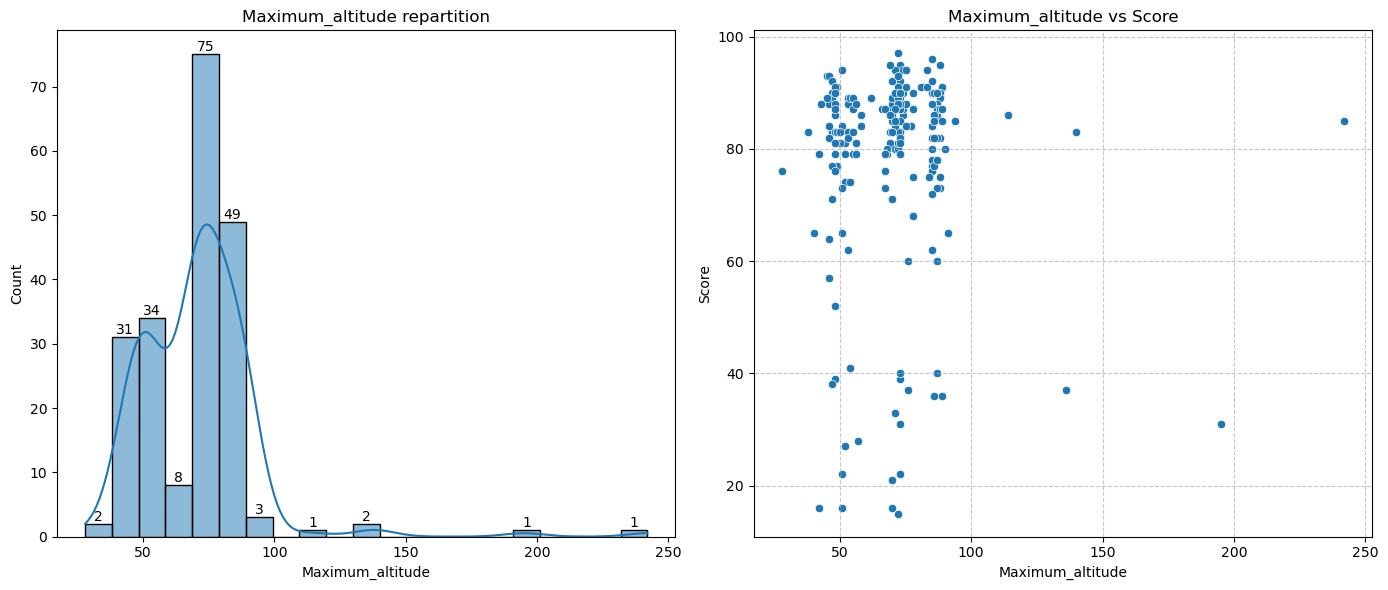

In [36]:
univariate_continous_EDA(data=df_work, var='Maximum_altitude', target='Score', activity_related=True)